# Disease Prediction using Machine Learning Algorithms

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report


### Loading Data

#### Main Dataset

In [3]:
df = pd.read_csv('../dataset/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Symptom Severity Dataset

In [4]:
df1 = pd.read_csv('../dataset/Symptom-severity.csv')
# print(df1.head())
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


#### Symptom Description Dataset

In [5]:
df2 = pd.read_csv('../dataset/symptom_Description.csv')
# print(df2.head())
df2.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


#### Symptom Precaution Dataset

In [6]:
df3 = pd.read_csv('../dataset/symptom_precaution.csv')
# print(df3.head())
df3.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


#### List of Diseases

In [7]:
diseases = set(df['Disease'])

print(diseases)
print('\n There are {} diseases described in the dataset'.format(len(diseases)))



{'Acne', 'Common Cold', 'Hepatitis B', 'AIDS', 'Paralysis (brain hemorrhage)', 'Osteoarthristis', 'Fungal infection', 'GERD', 'Jaundice', 'Allergy', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)', 'Hypothyroidism', '(vertigo) Paroymsal  Positional Vertigo', 'Hypoglycemia', 'Typhoid', 'Hepatitis E', 'Urinary tract infection', 'Drug Reaction', 'Impetigo', 'Tuberculosis', 'Varicose veins', 'Pneumonia', 'Hepatitis D', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Heart attack', 'Arthritis', 'Malaria', 'Hepatitis C', 'Hypertension ', 'Dengue', 'Peptic ulcer diseae', 'Chicken pox', 'Chronic cholestasis', 'Hyperthyroidism', 'hepatitis A', 'Migraine', 'Psoriasis'}

 There are 41 diseases described in the dataset


#### List of symptoms

In [8]:
symptoms = set(df.iloc[:,1:].values.flatten())

print(symptoms)
print('\nThere are {} symptoms described in the dataset'.format(len(symptoms) - 1))

{nan, ' mood_swings', ' puffy_face_and_eyes', ' mucoid_sputum', ' lethargy', ' pain_during_bowel_movements', ' constipation', ' painful_walking', ' phlegm', ' skin_peeling', ' continuous_feel_of_urine', ' breathlessness', ' bladder_discomfort', ' weakness_in_limbs', ' sinus_pressure', ' altered_sensorium', ' hip_joint_pain', ' ulcers_on_tongue', ' irritation_in_anus', ' abnormal_menstruation', ' stomach_bleeding', ' runny_nose', ' slurred_speech', ' cold_hands_and_feets', ' redness_of_eyes', ' sweating', ' polyuria', ' patches_in_throat', ' nodal_skin_eruptions', ' back_pain', ' shivering', ' increased_appetite', ' weakness_of_one_body_side', ' dark_urine', ' fatigue', ' pus_filled_pimples', ' restlessness', ' neck_pain', ' dehydration', ' diarrhoea', ' nausea', ' blister', ' unsteadiness', ' headache', 'itching', ' swollen_legs', ' burning_micturition', ' skin_rash', ' joint_pain', ' blood_in_sputum', ' high_fever', ' swelled_lymph_nodes', ' internal_itching', ' movement_stiffness', '

### Data Preprocessing

##### Handling Missing data

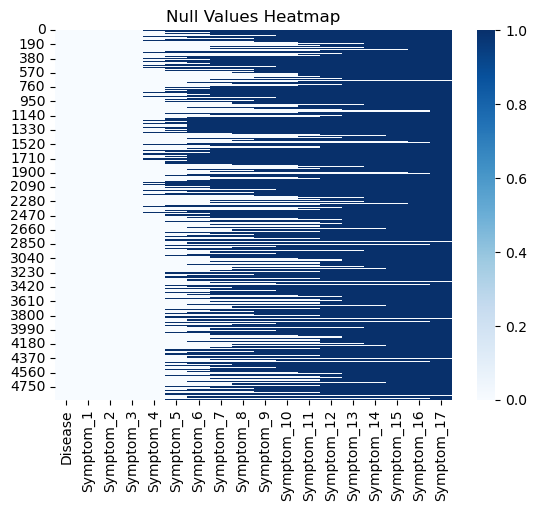

In [9]:
sns.heatmap(df.isnull(), cmap='Blues')
plt.title('Null Values Heatmap')
plt.show()

In [10]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [11]:
df = df.apply(lambda x: x.str.strip() )
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.lower() )
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: x.str.replace(' ', ''))


df = df.fillna(0)

symptoms = list(set(df.iloc[:,1:].values.flatten()))
symptoms.remove(0)

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic_patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_ofurine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


##### Encoding  the symptoms with their severity weight

In [12]:
# Create a dictionary mapping each symptom to its severity
severity_map = dict(zip(df1['Symptom'], df1['weight']))

     

# replace the symptoms  with their severity
encoded_df = df.replace(severity_map)

encoded_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,6,4,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0


#### Storing the diseases and encoded symptoms in seperate dataframes

In [13]:
cols = df.columns

(encoded_df[cols] == 0).all()

encoded_df['Disease'].value_counts()

encoded_df['Disease'].unique()

data = encoded_df.iloc[:,1:].values  
labels = encoded_df['Disease'].values 



#### Splitting the data 


In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,  train_size = 0.70, shuffle=True, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3444, 17) (1476, 17) (3444,) (1476,)


### Model Training and Testing

####  Random Forest Classifier

[[32  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 39]]
Accuracy% = 99.32249322493224
F1 Score = 99.32522594436315


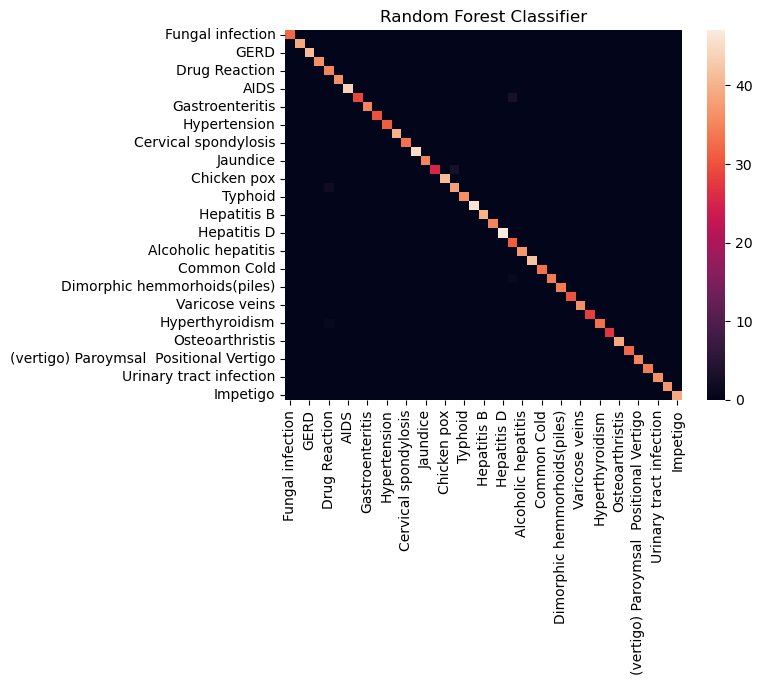

In [19]:
import matplotlib.pyplot as plt

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
result = rfc.predict(x_test)


conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

ax = plt.axes()
sns.heatmap(df_cm)
ax.set_title('Random Forest Classifier')


print(conf_mat)

rfc_score = accuracy_score(y_test, result) * 100

print('Accuracy% =', rfc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') *  100)



#### Decision Tree Classifier

Accuracy% = 99.32249322493224
F1 Score = 99.32522594436315


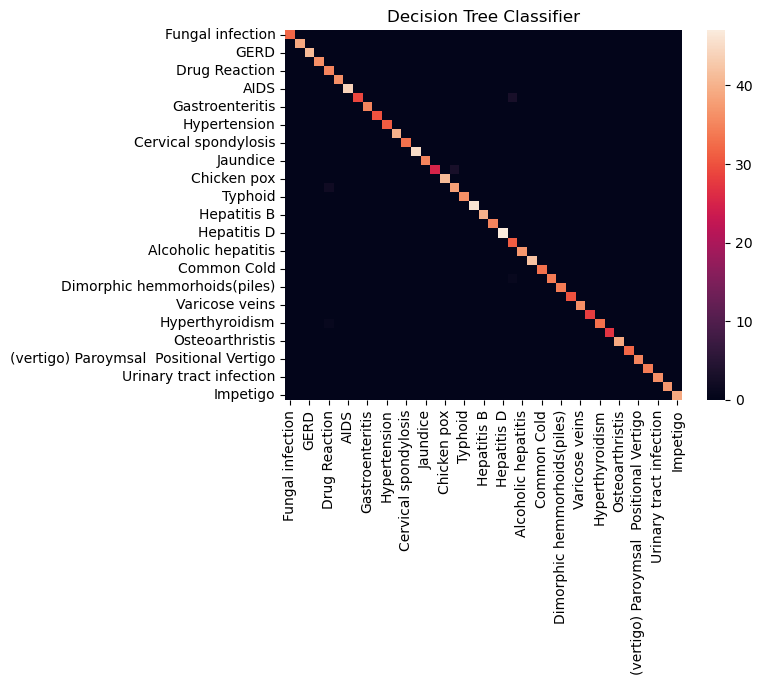

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
result = dtc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())


ax = plt.axes()
sns.heatmap(df_cm)
ax.set_title('Decision Tree Classifier')

dtc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', dtc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)


#### Naives Bayes Classifier

Accuracy% = 85.84010840108401
F1 Score = 84.93948169258316


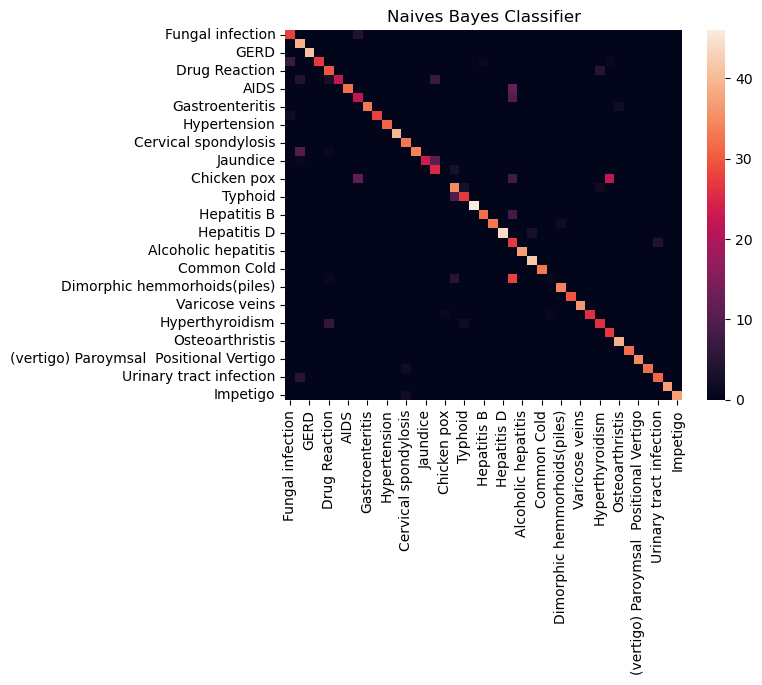

In [21]:
nbc = GaussianNB()
nbc.fit(x_train, y_train)
result = nbc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

ax = plt.axes()
sns.heatmap(df_cm)
ax.set_title('Naives Bayes Classifier')

nbc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', nbc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)


#### K-Nearest Neighbors Classifier

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy% = 99.1869918699187
F1 Score = 99.18502961296196


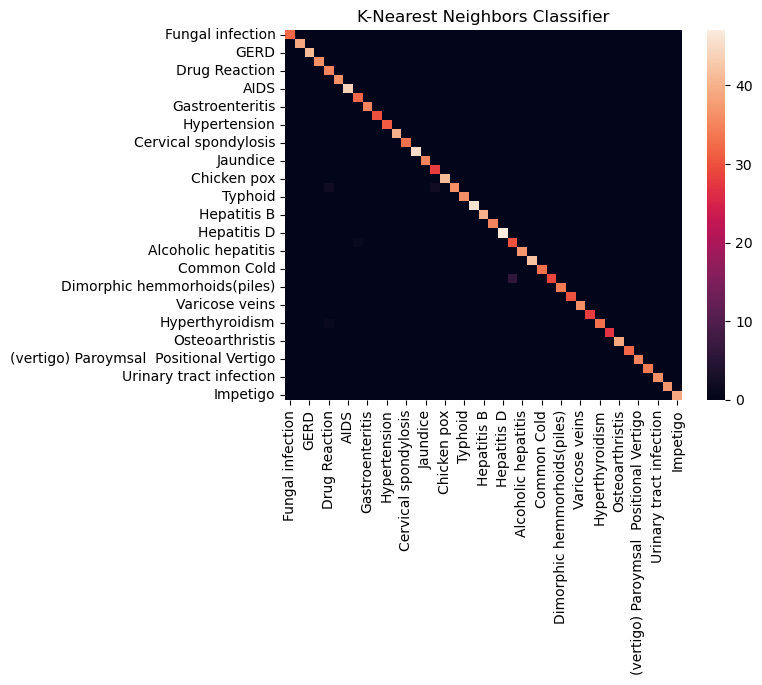

In [22]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
result = knc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

ax = plt.axes()
sns.heatmap(df_cm)
ax.set_title('K-Nearest Neighbors Classifier')

knc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', knc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)

#### Support Vector Classifier

Accuracy% = 91.32791327913279
F1 Score = 91.26548587692254


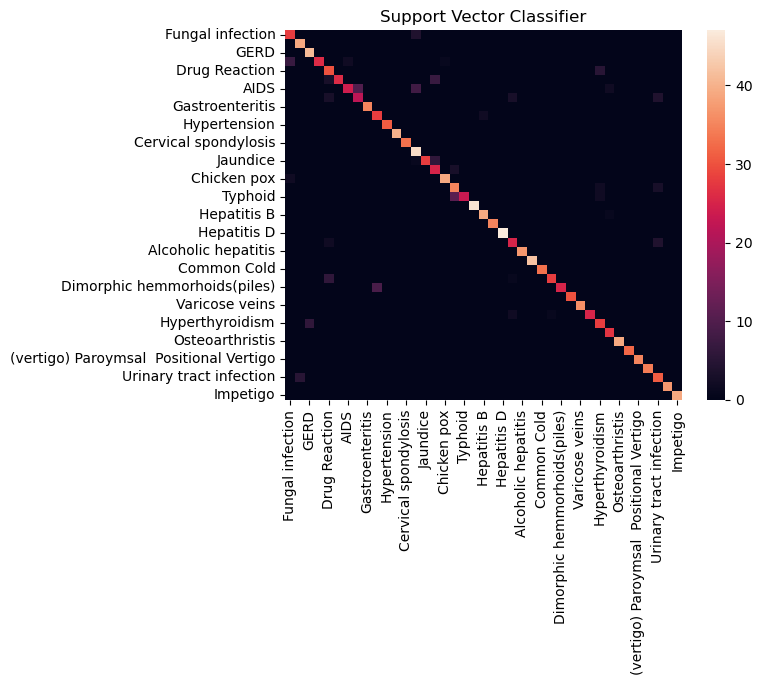

In [23]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
result = svc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())

ax = plt.axes()
sns.heatmap(df_cm)
ax.set_title('Support Vector Classifier')

svc_score = accuracy_score(y_test, result) * 100

print( 'Accuracy% =', svc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') * 100)

#### Comparing the accuracy of all the models

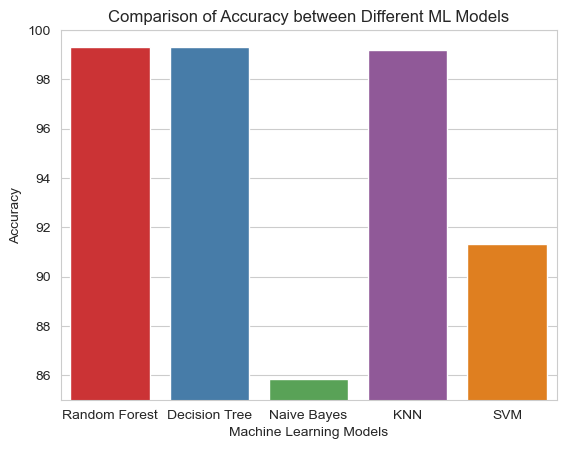

In [24]:
models = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'KNN', 'SVM']
accuracies = [rfc_score, dtc_score, nbc_score, knc_score, svc_score]

sns.set_style("whitegrid")
sns.set_palette("Set1")
sns.barplot(x=models, y=accuracies)

plt.ylim(85, 100)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy between Different ML Models")
plt.show()


### Making Predictions

In [25]:
def predict_disease(symptoms_list,model,top_k=5):
    # Encode the symptoms based on their severity
    encoded_symptoms = [severity_map[symptom] for symptom in symptoms_list]
    
    for i  in range(len(encoded_symptoms),17):
        encoded_symptoms.append(0)
        
    # Create a numpy array from the encoded symptoms
    symptoms_array = np.array(encoded_symptoms).reshape(1,-1)
 
     # Use the trained model to predict the probabilities of all diseases
    disease_probs = model.predict_proba(symptoms_array)[0]
    
    # Sort the predicted probabilities in descending order
    sorted_probs_idx = np.argsort(disease_probs)[::-1]
    
    # Get the top-k predicted diseases and their probabilities
    top_k_diseases = [(model.classes_[idx], disease_probs[idx]) for idx in sorted_probs_idx[:top_k]]
    
    return top_k_diseases

In [26]:
def output_predicted_diseases(symptoms_list,model,top_k=5):
    top_k_diseases = predict_disease(symptoms_list,model,top_k)
    
    print('The predicted disease is {} with probability {:.2f}%\n'.format(top_k_diseases[0][0], top_k_diseases[0][1]*100))
    
    print(top_k_diseases)

    predict_diseases = [disease[0] for disease in top_k_diseases]
    
    predict_probs = [disease[1] for disease in top_k_diseases]
    
    sns.set_style("whitegrid")
    sns.set_palette("Set1")
    sns.barplot(x=predict_diseases, y=predict_probs)
    

    plt.xlabel("Different Diseases")
    plt.ylabel("Probability")
    plt.title("Predicted Diseases and their Probabilities")
    plt.tight_layout()
    plt.show()


The predicted disease is Fungal infection with probability 70.00%

[('Fungal infection', 0.7), ('Chronic cholestasis', 0.07), ('Psoriasis', 0.06), ('Paralysis (brain hemorrhage)', 0.05), ('Jaundice', 0.05)]


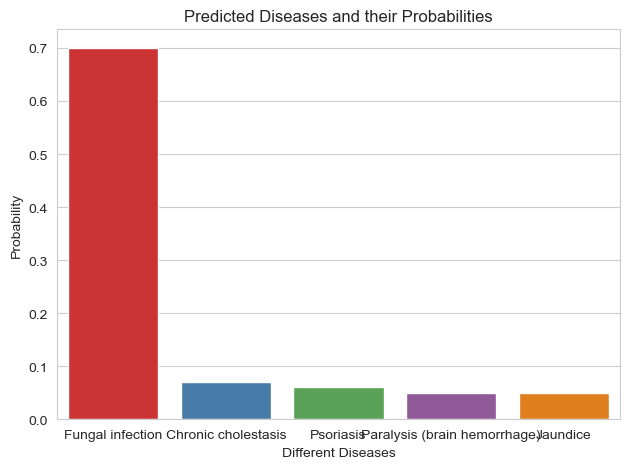

In [25]:
symptomsList = ['itching', 'skin_peeling', 'skin_rash']

output_predicted_diseases(symptomsList,rfc)
      

### Deploying Trained Model

In [27]:
with open('../models/RandomForestClassifier.plk', 'wb') as file:
    pickle.dump(rfc, file)
    
with open('../models/DecisionTreeClassifier.plk', 'wb') as file:
      pickle.dump(dtc, file)
      
with open('../models/GaussianNB.plk', 'wb') as file:
      pickle.dump(nbc, file)

with open('../models/KNeighborsClassifier.plk', 'wb') as file:
      pickle.dump(knc, file)
      
with open('../models/SVC.plk', 'wb') as file:
      pickle.dump(svc, file)
      
with open('../models/symptoms.plk', 'wb') as file:
      pickle.dump(symptoms, file)
      
with open('../models/severity_map.plk', 'wb') as f:
    pickle.dump(severity_map, f)
    
precaution_dict = {}    
    
for row in df3.values:
    precaution_dict[row[0]] = row[1:]   

with open('../models/precaution_dict.plk', 'wb') as f:
    pickle.dump(precaution_dict, f)      